In [36]:
import os
import pydicom
import matplotlib.cm as cm
from matplotlib import animation
from tqdm import tqdm
import matplotlib.patches as mpatches

from utils import *

In [37]:
ct_images_path = "data/manifest-1715269027871-20240509T164701Z-001/manifest-1715269027871/HCC-TACE-Seg/HCC_013/08-16-1998-NA-ABDPELVIS-02874/5.000000-Recon 3 LIVER 3 PHASE AP-81040"
segmentation_image_path = "data/manifest-1715269027871-20240509T164701Z-001/manifest-1715269027871/HCC-TACE-Seg/HCC_013/08-16-1998-NA-ABDPELVIS-02874/300.000000-Segmentation-69940/1-1.dcm"

In [38]:
image_path = os.path.join(ct_images_path, os.listdir(ct_images_path)[0])
image = pydicom.dcmread(image_path)
print(image.pixel_array.shape)
print(image)
print(image.pixel_array)

(512, 512)
Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 206
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.14519.5.2.1.1706.8374.107712825881298838417299248086
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.3.6.1.4.1.22213.1.143
(0002, 0013) Implementation Version Name         SH: '0.5'
(0002, 0016) Source Application Entity Title     AE: 'POSDA'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL']
(0008, 0013) Instance Creation Time              TM: '171529'
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP In

In [39]:
segmentation = pydicom.dcmread(segmentation_image_path)
segmentation.pixel_array.shape

(324, 512, 512)

In [40]:
frames = segmentation.PerFrameFunctionalGroupsSequence
print(frames[0].DerivationImageSequence[0].SourceImageSequence[0].ReferencedSOPInstanceUID)


1.3.6.1.4.1.14519.5.2.1.1706.8374.172741934018661566763726681611


In [41]:
from data_structures.ct_image import CTImage
from data_structures.segmentation_image import SegmentationImage
from data_structures.mapping import CTMapping

In [42]:
ct_image = CTImage()
ct_image.load_data(ct_images_path)
len(ct_image.slices)

81

In [43]:
seg_image = SegmentationImage()
seg_image.load_data(segmentation_image_path)

In [44]:
mapping = CTMapping(ct_image, seg_image)
mapping.do_mapping()

for map in mapping.mappings:
    print(map[0].slice_location, map[0].sop_instance_uid, map[1].sop_instance_uid)


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [

In [45]:
mapping.image.shape

(81, 512, 512)

In [46]:
mapping.segmentations[3].shape

(81, 512, 512)

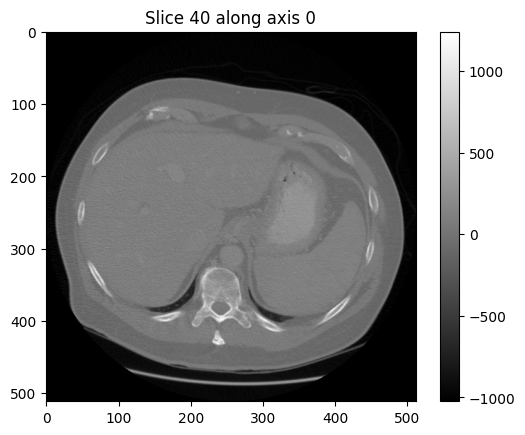

In [47]:
mapping.plot_image_slice(40, axis=0)

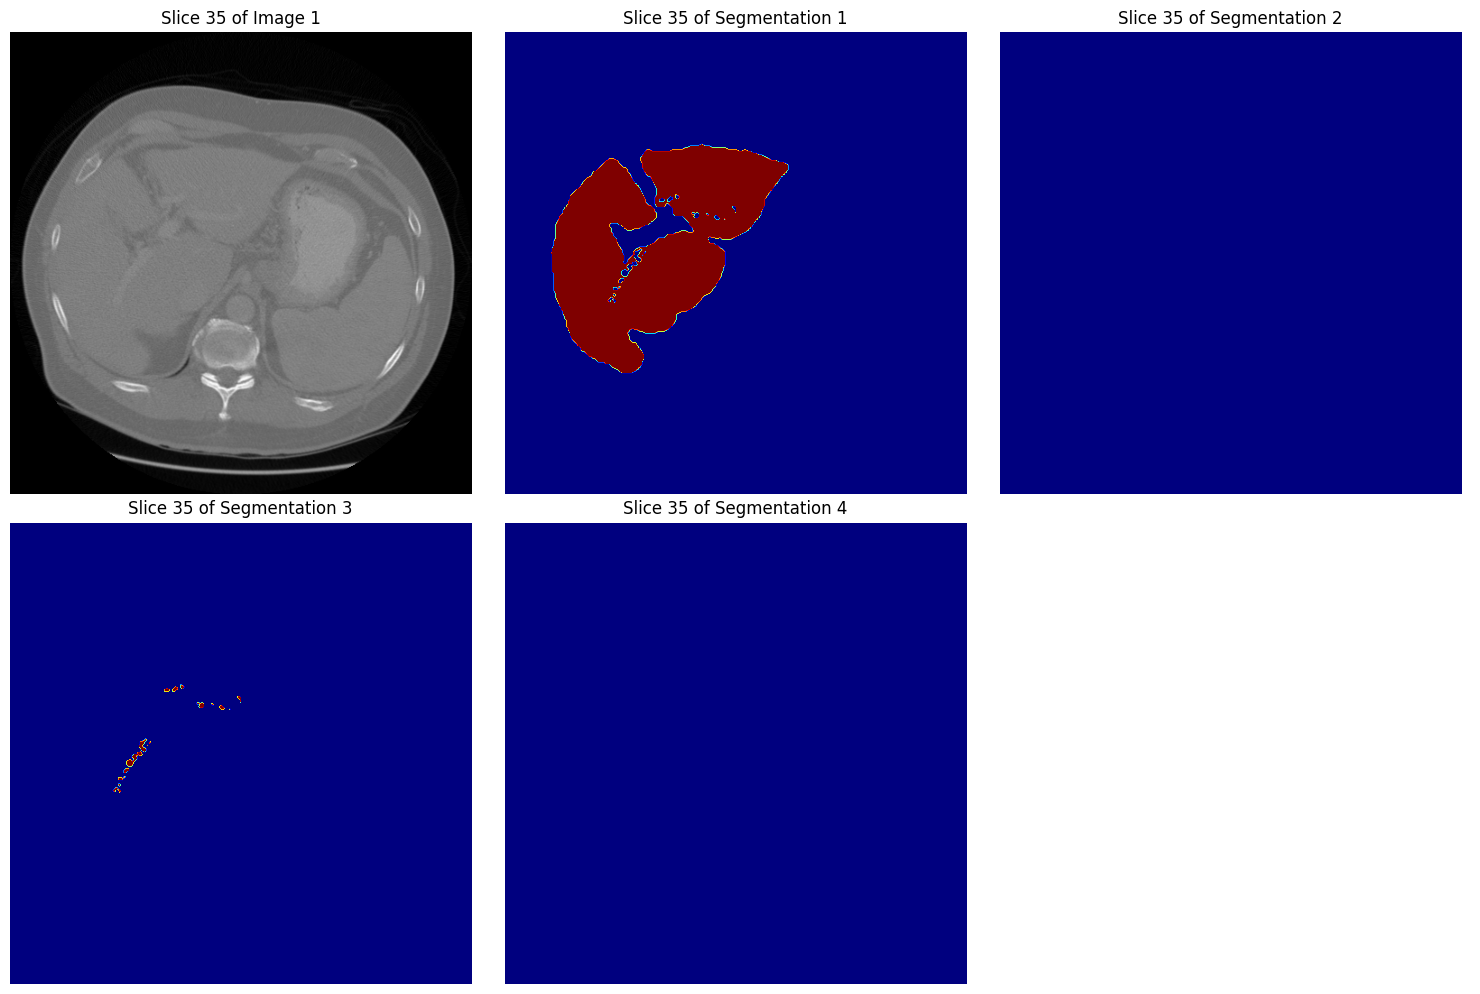

In [48]:
mapping.plot_image_slice_with_segments(35)

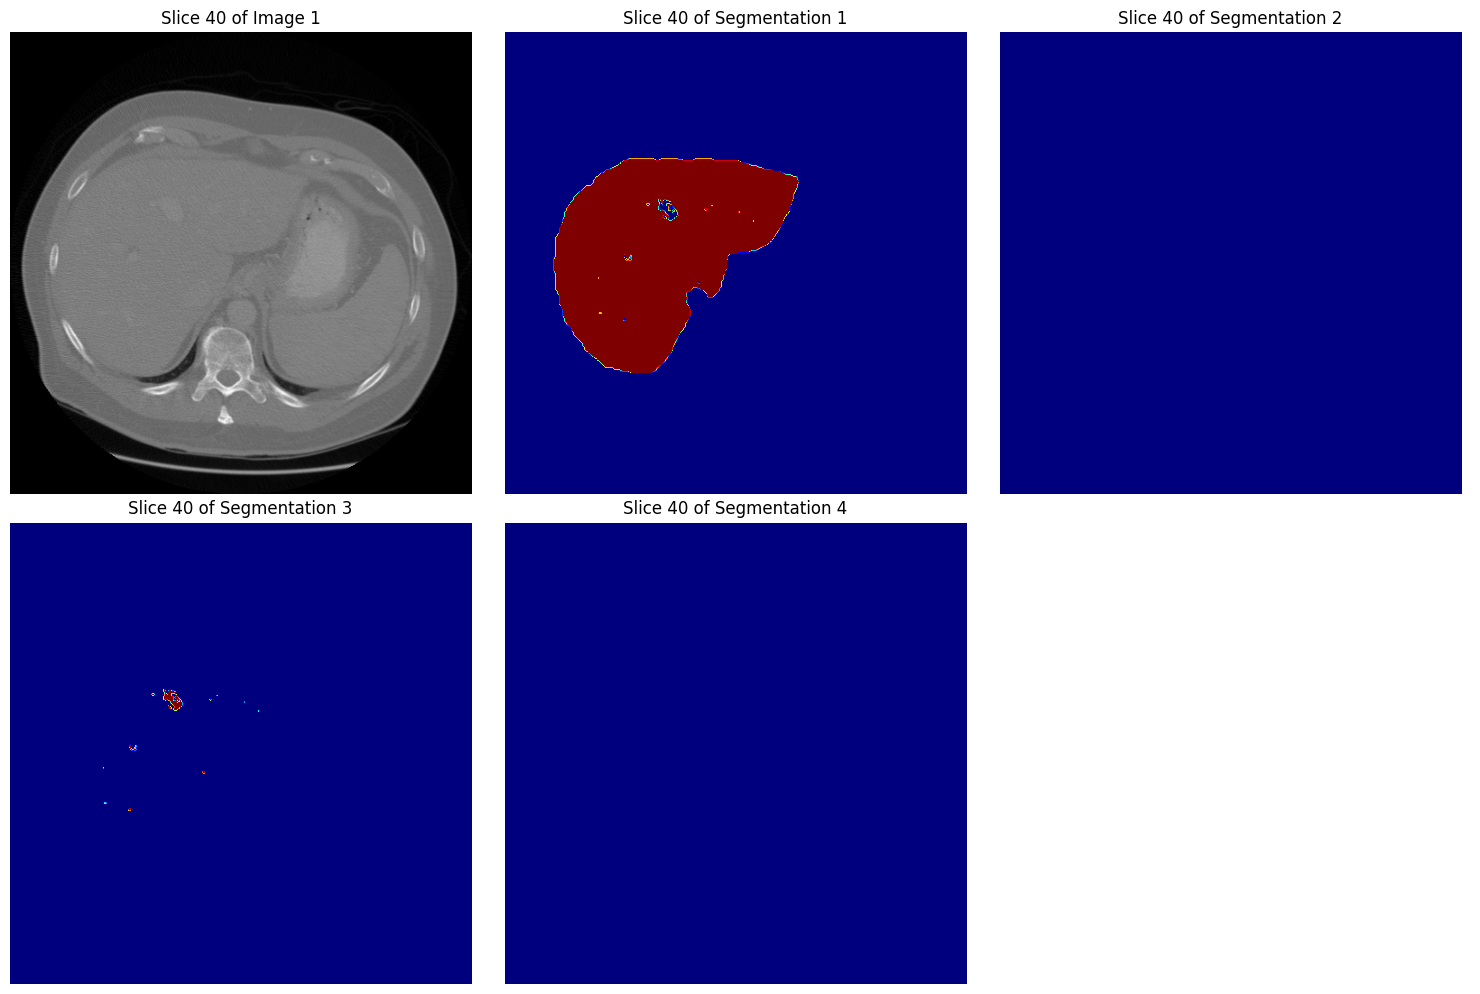

In [49]:
mapping.plot_image_slice_with_segments(40)

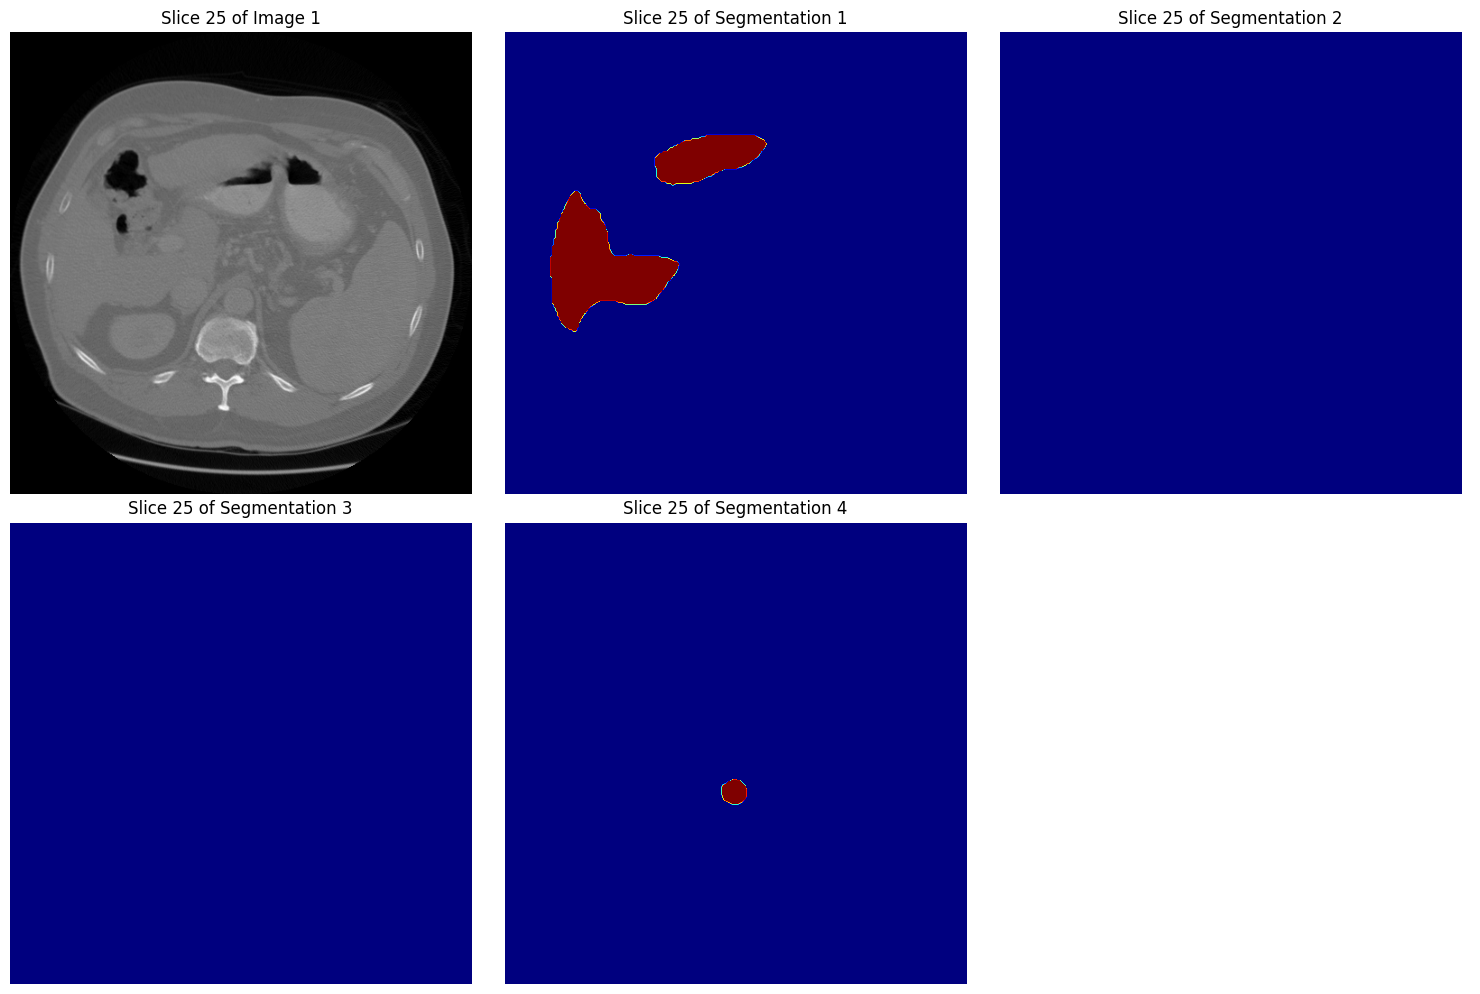

In [50]:
mapping.plot_image_slice_with_segments(25)

In [51]:
visualize_alpha_fusion(mapping.image[40], mapping.segmentations[0][40], alpha=0.2)

array([[[0. , 0. , 0. , 0.8],
        [0. , 0. , 0. , 0.8],
        [0. , 0. , 0. , 0.8],
        ...,
        [0. , 0. , 0. , 0.8],
        [0. , 0. , 0. , 0.8],
        [0. , 0. , 0. , 0.8]],

       [[0. , 0. , 0. , 0.8],
        [0. , 0. , 0. , 0.8],
        [0. , 0. , 0. , 0.8],
        ...,
        [0. , 0. , 0. , 0.8],
        [0. , 0. , 0. , 0.8],
        [0. , 0. , 0. , 0.8]],

       [[0. , 0. , 0. , 0.8],
        [0. , 0. , 0. , 0.8],
        [0. , 0. , 0. , 0.8],
        ...,
        [0. , 0. , 0. , 0.8],
        [0. , 0. , 0. , 0.8],
        [0. , 0. , 0. , 0.8]],

       ...,

       [[0. , 0. , 0. , 0.8],
        [0. , 0. , 0. , 0.8],
        [0. , 0. , 0. , 0.8],
        ...,
        [0. , 0. , 0. , 0.8],
        [0. , 0. , 0. , 0.8],
        [0. , 0. , 0. , 0.8]],

       [[0. , 0. , 0. , 0.8],
        [0. , 0. , 0. , 0.8],
        [0. , 0. , 0. , 0.8],
        ...,
        [0. , 0. , 0. , 0.8],
        [0. , 0. , 0. , 0.8],
        [0. , 0. , 0. , 0.8]],

       [[0. 

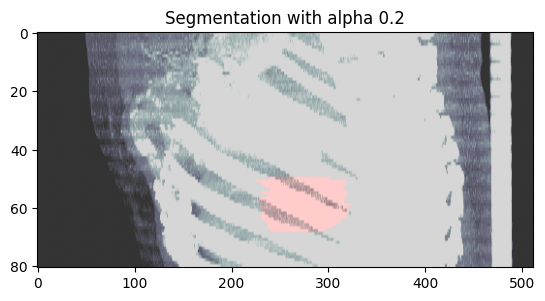

In [52]:
visualize_alpha_fusion(MIP_sagittal_plane(mapping.image), MIP_sagittal_plane(mapping.segmentations[1]), alpha=0.2, aspect=3, visualize=True)

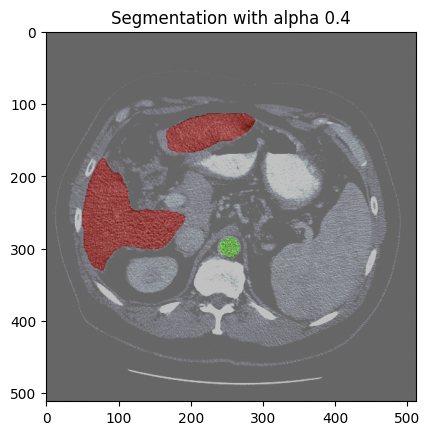

In [53]:
index=25
visualize_alpha_fusion(mapping.image[index], mapping.segmentation_image_combined[index], alpha=0.4, visualize=True)

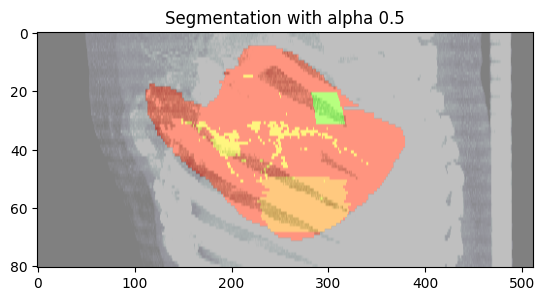

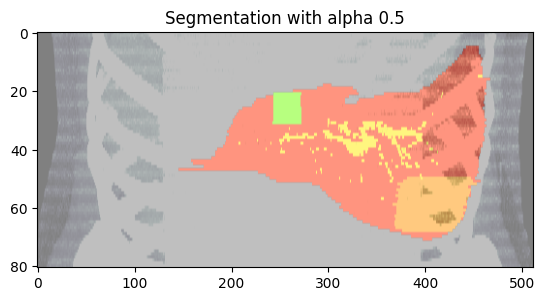

(81, 512, 512)
(81, 512, 512)


In [54]:
image = mapping.image
segmentation = mapping.segmentation_image_combined

visualize_alpha_fusion(MIP_sagittal_plane(img_dcm=image), MIP_sagittal_plane(segmentation), alpha=0.5, aspect=3, visualize=True)

rotated_img = rotate_on_axial_plane(image, 90)
rotated_seg = rotate_on_axial_plane(segmentation, 90)

visualize_alpha_fusion(MIP_sagittal_plane(img_dcm=rotated_img), MIP_sagittal_plane(rotated_seg), alpha=0.5, aspect=3, visualize=True)

print(image.shape)
print(segmentation.shape)

36it [01:03,  1.75s/it]
MovieWriter ffmpeg unavailable; using Pillow instead.


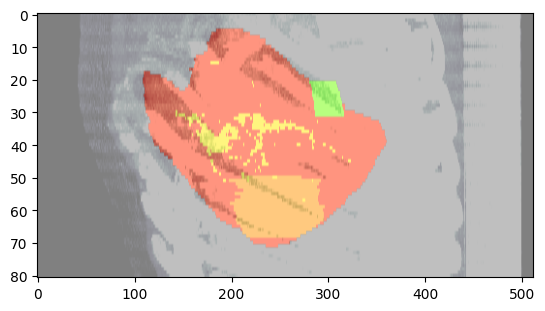

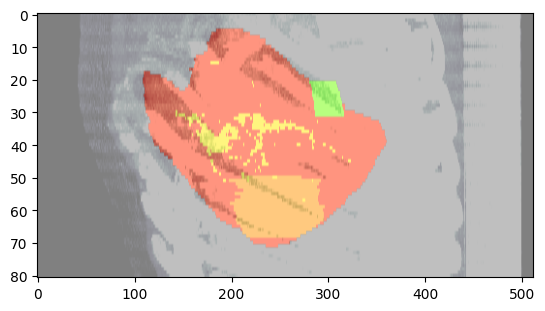

In [55]:
fig, ax = plt.subplots()
cm = matplotlib.colormaps.get_cmap('bone')

alpha = 0.5
n = 36
projections = []
slice_thickness = 2.5
pixel_spacing = [0.742188, 0.742188]

for i, angle in tqdm(enumerate(np.linspace(0, 360*(n-1)/n, num=n))):
    # Clear the current axes before plotting the next frame
    ax.clear()

    rotated_img = rotate_on_axial_plane(mapping.image, angle)
    rotated_seg = rotate_on_axial_plane(mapping.segmentation_image_combined, angle)

    projection_img = MIP_sagittal_plane(rotated_img)
    projection_seg = MIP_sagittal_plane(rotated_seg)

    projection = visualize_alpha_fusion(projection_img, projection_seg, alpha, visualize=False)
    ax.imshow(projection, aspect=slice_thickness / pixel_spacing[0], cmap=cm)
    plt.savefig(f'./projections/Projection_{i}.png')  # Save each frame as an image
    projections.append(projection)  # Save for later animation

fig, ax = plt.subplots()

animation_data = [
    [plt.imshow(img, animated=True, aspect=slice_thickness / pixel_spacing[0], cmap=cm)]
    for img in projections
]
anim = animation.ArtistAnimation(fig, animation_data, interval=250, blit=True, repeat_delay=1000)
anim.save('./animations/animation10.gif')  # Save animation
plt.show()  # Show animation
